In [13]:
# /// script
# requires-python = ">=3.10"
# ///
from pathlib import Path
from datetime import datetime
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import imageio
%matplotlib inline

*Intro to Digital Images – Boston Bioimage Analysis Course*

Welcome to the digital image chapter!  
Just like the previous notebook, it is **an interactive book**: read, explore, and **do**.

> **Why Images?**  
> Digital microscopy, image analysis, and machine learning all start with pixels.  
> Understanding that an image **is just pixel values** unlocks a world of quantitative analysis.

| Section | Concept | Why it matters |
|---------|---------|----------------|
| 1 | Pixels as Arrays | Images are numbers you can compute on |
| 2 | Loading & Display | Bring real data into NumPy, visualize it |
| 3 | Basic Operations | Brightness, color channels, cropping |
| 4 | Saving & Formats | Persist your results |


## 1. Pixels as Arrays


**Concept: Images as Arrays**

A **digital image** is nothing more than a rectangular **grid of pixels**.  
Each pixel stores one or more numbers:

| Image type | Numbers per pixel | Typical NumPy shape |
|------------|------------------|---------------------|
| Grayscale  | **1** (intensity) | `(height, width)` |
| RGB color  | **3** (R, G, B)   | `(height, width, 3)` |

Because the grid is regular, it maps perfectly to a **NumPy array**.

---

**Tiny 3 × 3 example**

```python
import numpy as np
img = np.zeros((3, 3), dtype=np.uint8)
print(img)
print("Shape:", img.shape)
```

```
[[0 0 0]
 [0 0 0]
 [0 0 0]]
Shape: (3, 3)
```

---

With NumPy you can create, inspect, and transform images with ordinary array syntax (add, multiply, slice…). These tiny examples scale up seamlessly to 1024 × 1024 microscopy images.


### ✍️ Exercise: your turn!
Create a **5 × 5** NumPy array called `blink` where the *center pixel* has value **255** and the rest are **0**.  
Print the array and its shape.

In [ ]:
# write your code here

## 2. Loading & Displaying Real Images

**Concept.**  
Real images live on disk as **PNG/JPEG/TIFF** files. We can load them with **imageio**, convert to a NumPy array with `np.asarray`, and plot with `matplotlib`.

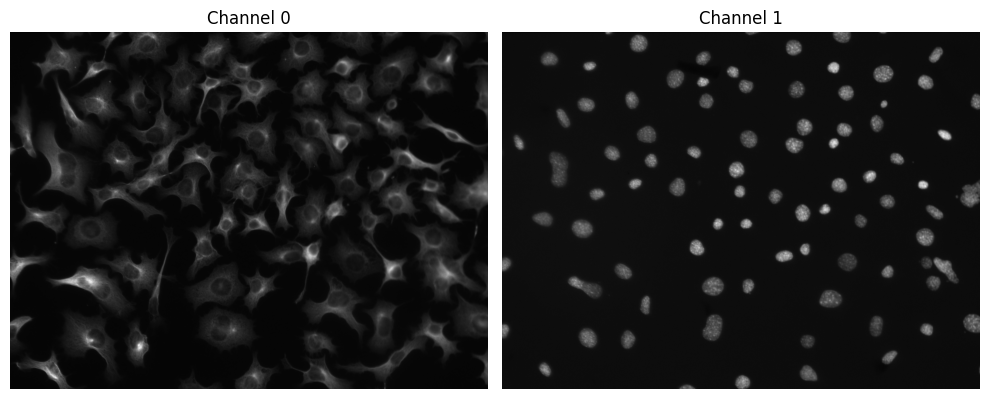

In [40]:
# load the image
try:
    from imageio.v2 import volread
except ImportError as e:
    raise ImportError(
        "Please `pip install imageio` to load cells"
    ) from e

image_url = "https://raw.githubusercontent.com/rkarmaka/sample-datasets/main/cells/cells_1.tif"
image = np.asarray(volread(image_url))

# Display
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(image[0], cmap='gray')
axes[0].set_title("Channel 0")
axes[0].axis('off')

axes[1].imshow(image[1], cmap='gray')
axes[1].set_title("Channel 1")
axes[1].axis('off')

plt.tight_layout()

### ✍️ Exercise
Adapt the code above to plot the composite of channels 0 and 1.

Hint: you can use `np.stack` to create the composite image.

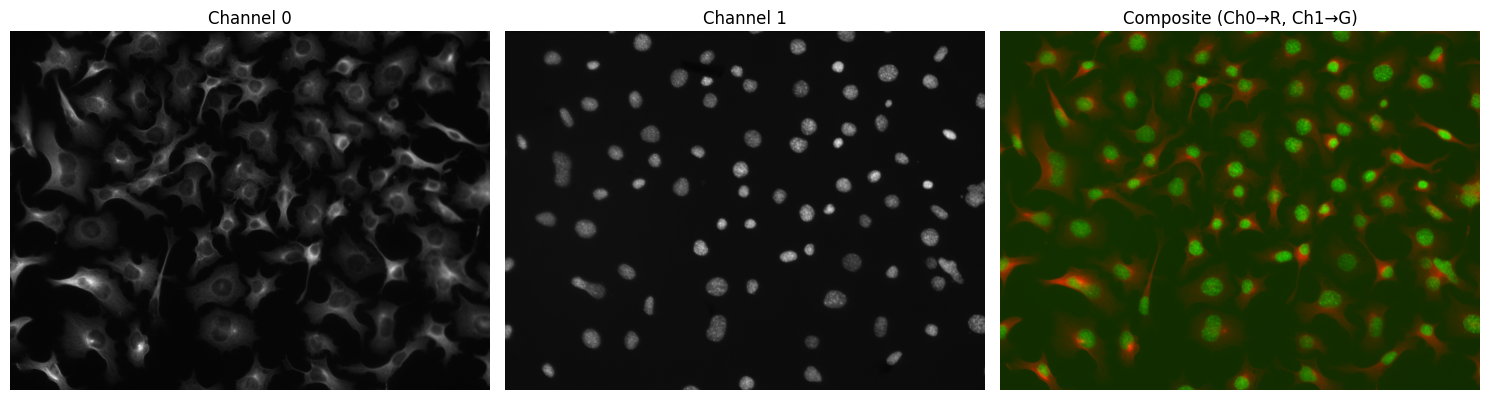

In [43]:
# write your code here

# Normalize channels to [0, 1] for display, without modifying original image
ch0 = image[0].astype(float)
ch1 = image[1].astype(float)
ch0 /= ch0.max() if ch0.max() > 0 else 1
ch1 /= ch1.max() if ch1.max() > 0 else 1

# Composite using matplotlib-compatible float RGB
composite = np.stack([ch0, ch1, np.zeros_like(ch0)], axis=-1)  # R = ch0, G = ch1, B = 0

# Plot channels and composite
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(ch0, cmap='gray')
axes[0].set_title("Channel 0")
axes[0].axis('off')

axes[1].imshow(ch1, cmap='gray')
axes[1].set_title("Channel 1")
axes[1].axis('off')

axes[2].imshow(composite)
axes[2].set_title("Composite (Ch0→R, Ch1→G)")
axes[2].axis('off')

plt.tight_layout()
plt.show()

## 3. Basic NumPy Image Operations

**Concept.**  
Once an image is a NumPy array, vectorized math lets you transform it quickly:
- Add / subtract → change **brightness**
- Multiply → scale **contrast**
- Slice rows/cols → **crop**

In [ ]:
# Brighten the 3×3 demo image by +50 (clip to 255)
bright = np.clip(img + 50, 0, 255)
print(bright)

### ✍️ Exercise: guess the output!
What will the following code display?  Think before you run it!
```python
inverted = 255 - img  # assumes uint8
print(inverted)
```

In [ ]:
# your guess – then run to check
inverted = 255 - img
print(inverted)

### ✍️ Exercise: your turn!
Using the RGB image you loaded as `img_np`:
1. **Zero** the green channel (`img_np[..., 1]`).  
2. Display the result.  
3. Save it as `no_green.png` using `Image.fromarray`.

In [ ]:
# write your code here

## 4. Saving & File Formats

**Concept.**  
Use `Pillow` or `imageio` to write NumPy arrays back to disk in formats like PNG or TIFF.  
PNG is lossless for 8‑bit data; JPEG compresses but loses information.

In [ ]:
# Assuming `bright` exists, save it as PNG
out_path = Path('bright_demo.png')
Image.fromarray(bright).save(out_path)
print('Saved to', out_path.resolve())

### 🎁 Bonus
Write a function `rgb_to_gray(rgb)` that takes an RGB NumPy array and returns a grayscale array using the weights **0.299, 0.587, 0.114**.  Test it on your image.

In [ ]:
# write your code here